## Regression Assignment : Predicting House Prices

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

 
Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting display limits of column and row value to 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
#Importing cvs file
df_house = pd.read_csv('train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Data Handling

In [4]:
#Correction of data values and changing null values in categorical data to one more category wherever needed(ex:-'No Basement')
df_house.loc[df_house['MSZoning']=='C (all)','MSZoning'] = 'C'
df_house.loc[df_house['Alley'].isna(),'Alley'] = 'No Alley Access'
df_house.loc[df_house['BldgType']=='Twnhs','BldgType'] = 'TwnhsI'
df_house.loc[df_house['Exterior2nd']=='Wd Shng','Exterior2nd'] = 'Wd Sdng'
df_house.loc[df_house['Exterior2nd']=='CmentBd','Exterior2nd'] = 'CemntBd'
df_house.loc[df_house['Exterior2nd']=='Brk Cmn','Exterior2nd'] = 'BrkComm'
df_house.loc[df_house['MasVnrType'].isna(),'MasVnrType'] = 'None'
df_house.loc[df_house['BsmtQual'].isna(),'BsmtQual'] = 'No Basement'
df_house.loc[df_house['BsmtCond'].isna(),'BsmtCond'] = 'No Basement'
df_house.loc[df_house['BsmtExposure'].isna(),'BsmtExposure'] = 'No Basement'
df_house.loc[df_house['BsmtFinType1'].isna(),'BsmtFinType1'] = 'No Basement'
df_house.loc[df_house['BsmtFinType2'].isna(),'BsmtFinType2'] = 'No Basement'
df_house.loc[df_house['FireplaceQu'].isna(),'FireplaceQu'] = 'No Fireplace'
df_house.loc[df_house['GarageType'].isna(),'GarageType'] = 'No Garage'
df_house.loc[df_house['GarageYrBlt'].isna(),'GarageYrBlt'] = 0
df_house.loc[df_house['GarageFinish'].isna(),'GarageFinish'] = 'No Garage'
df_house.loc[df_house['GarageQual'].isna(),'GarageQual'] = 'No Garage'
df_house.loc[df_house['GarageCond'].isna(),'GarageCond'] = 'No Garage'
df_house.loc[df_house['PoolQC'].isna(),'PoolQC'] = 'No Pool'
df_house.loc[df_house['Fence'].isna(),'Fence'] = 'No Fence'
df_house.loc[df_house['MiscFeature'].isna(),'MiscFeature'] = 'None'

In [5]:
#Filling null values in LotFrontage with median value
df_house.loc[df_house['LotFrontage'].isna(),'LotFrontage'] = df_house['LotFrontage'].median()

In [6]:
#Filling null values in MasVnrArea with 0 as MasVnrType is None in all those records
df_house.loc[df_house['MasVnrArea'].isna(),'MasVnrArea'] = 0

In [7]:
#Filling null values in Electrical with mode value of Electrical
df_house.loc[df_house['Electrical'].isna(),'Electrical'] = df_house['Electrical'].mode()[0]

In [8]:
#Checking for any null value
df_house.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

### Checking for duplicates

In [9]:
df_house.loc[df_house.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Derived Metrics

In [10]:
#Building a derived variable No_years_since_built which gives the age of the house
df_house['No_years_since_built'] = 2020 - df_house['YearBuilt']

In [11]:
#Building a derived variable No_years_since_last_remodel which gives the age of the house
df_house['No_years_since_last_remodel'] = 2020 - df_house['YearRemodAdd']

In [12]:
#Building a variable total bathrooms, hence we can remove other 4 bathroom variables
df_house['Total_Bathrooms'] = (df_house['FullBath'] + (0.5*df_house['HalfBath']) +
                            df_house['BsmtFullBath'] + (0.5*df_house['BsmtHalfBath']))

In [13]:
#Building a variable total surface area calculating over all surface area of house
df_house['TotalSF'] = (df_house['TotalBsmtSF'] + df_house['1stFlrSF'] + df_house['2ndFlrSF'])

In [14]:
#Dropping above columns which we don't need any more
df_house.drop(columns=['YearBuilt','YearRemodAdd'],inplace=True)
df_house = df_house.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'], axis=1)
df_house = df_house.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1)

### Label Encoding of ordered categorical variables

In [15]:
# LabelEncoding Done for ordered categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label = ('ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual','FireplaceQu','HeatingQC','GarageQual','GarageCond'
,'PoolQC','Fence','Street','Alley','CentralAir','MSSubClass','BsmtExposure','GarageFinish','PavedDrive',
'LandSlope','Functional')

# process columns, apply LabelEncoder to categorical features
for c in label:
    l = LabelEncoder() 
    l.fit(list(df_house[c].values)) 
    df_house[c] = l.transform(list(df_house[c].values))

In [16]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id                             1460 non-null int64
MSSubClass                     1460 non-null int64
MSZoning                       1460 non-null object
LotFrontage                    1460 non-null float64
LotArea                        1460 non-null int64
Street                         1460 non-null int64
Alley                          1460 non-null int64
LotShape                       1460 non-null object
LandContour                    1460 non-null object
Utilities                      1460 non-null object
LotConfig                      1460 non-null object
LandSlope                      1460 non-null int64
Neighborhood                   1460 non-null object
Condition1                     1460 non-null object
Condition2                     1460 non-null object
BldgType                       1460 non-null object
HouseStyle                     1460 non-null object
OverallQual   

## Data Visualization

<Figure size 720x576 with 0 Axes>

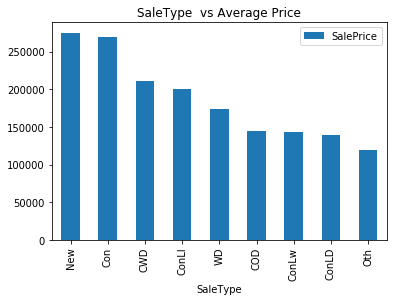

In [17]:
#Comparison of Average SalePrice with Saletype
plt.figure(figsize=(10, 8))

df_avg = pd.DataFrame(df_house.groupby(df_house['SaleType'])['SalePrice'].mean().sort_values(ascending = False))
df_avg.plot.bar()
plt.title('SaleType  vs Average Price')
plt.show()

### Observation 
New Sale Type has highest average SalePrice

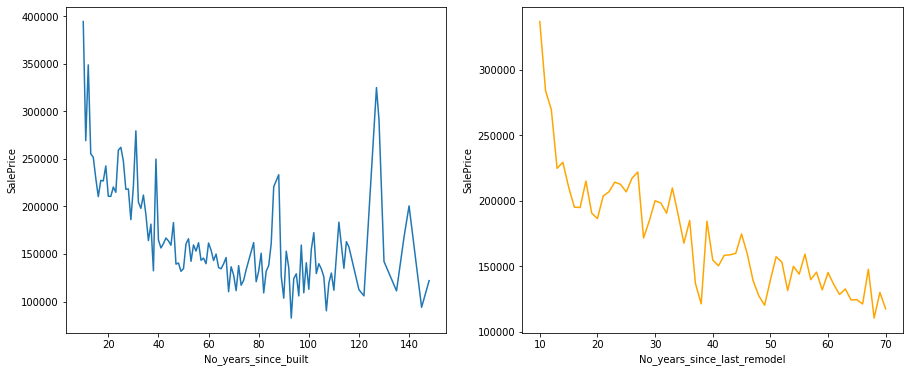

In [18]:
#Graph Average SalePrice vs No_years_since_built/No_years_since_last_remodel
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
df_avg = pd.DataFrame(df_house.groupby(df_house['No_years_since_built'])['SalePrice'].mean()).reset_index()
df_avg1 = pd.DataFrame(df_house.groupby(df_house['No_years_since_last_remodel'])['SalePrice'].mean()).reset_index()
sns.lineplot(x='No_years_since_built', y="SalePrice", data=df_avg, ax=ax1)
sns.lineplot(x='No_years_since_last_remodel', y="SalePrice",color = 'orange', data=df_avg1, ax=ax2)
#plt.xticks(rotation=45)
plt.show()

### Observation
1. Average Sale Price is highest for the recently built houses. However, we can also see a spike for the vintage houses.
2. Average Sale Price is highest for the recently remodeled houses.

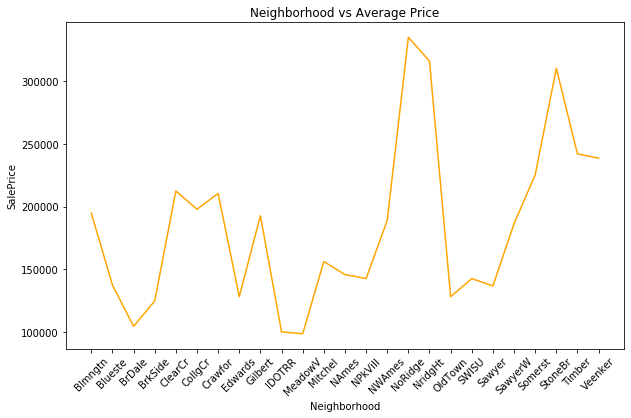

In [19]:
#Graph Average SalePrice vs Neighborhood
plt.figure(figsize=(10, 6))
df_avg = pd.DataFrame(df_house.groupby(df_house['Neighborhood'])['SalePrice'].mean()).reset_index()
sns.lineplot(x='Neighborhood', y="SalePrice",color='orange', data=df_avg)
plt.xticks(rotation=45)
plt.title('Neighborhood vs Average Price')
plt.show()                 

### Observation
Average Sale Price is highest for Neighborhood NoRidge and Stone Br respectively

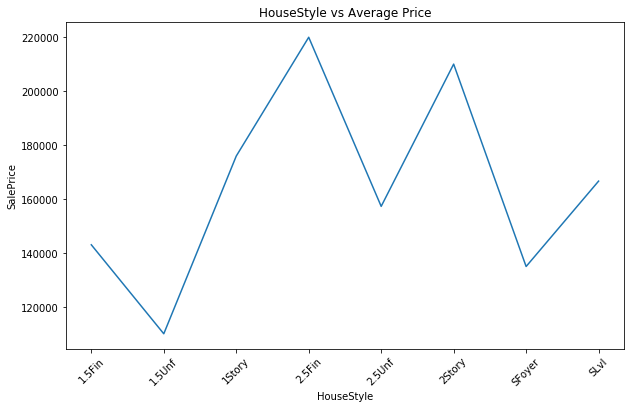

In [20]:
#Graph Average SalePrice vs HouseStyle
plt.figure(figsize=(10, 6))
df_avg = pd.DataFrame(df_house.groupby(df_house['HouseStyle'])['SalePrice'].mean()).reset_index()
g = sns.lineplot(x='HouseStyle', y="SalePrice", data=df_avg)
plt.xticks(rotation=45)
plt.title('HouseStyle vs Average Price')
plt.show()

### Observation
Average Sale Price is higher for finished houses as well as it rises as stories increases.

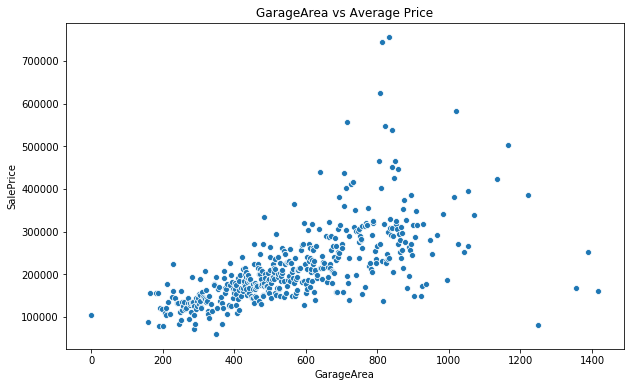

In [21]:
#Graph Average SalePrice vs GarageArea
plt.figure(figsize=(10, 6))
df_avg = pd.DataFrame(df_house.groupby(df_house['GarageArea'])['SalePrice'].mean()).reset_index()
g = sns.scatterplot(x='GarageArea', y="SalePrice", data=df_avg)
#plt.xticks(rotation=45)
plt.title('GarageArea vs Average Price')
plt.show()

### Observation
The scatterplot shows increase in avg Sale Price with increase in garage area

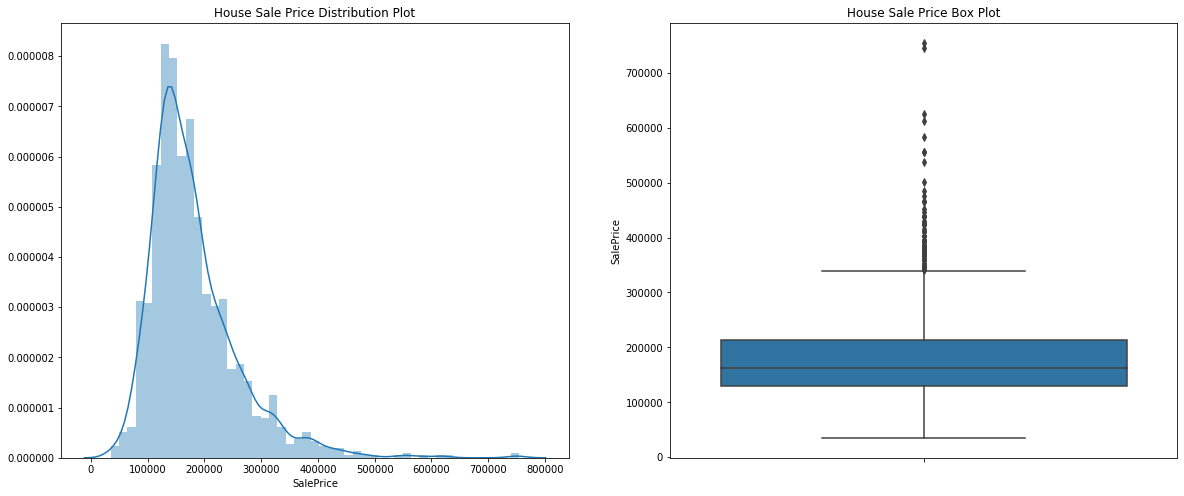

In [22]:
# House sale price data distribution plot and box plot
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Sale Price Distribution Plot')
sns.distplot(df_house.SalePrice)

plt.subplot(1,2,2)
plt.title('House Sale Price Box Plot')
sns.boxplot(y=df_house.SalePrice)

plt.show()

### Observation
We can clearly see the distribution of SalePrice is rightly skewed. So, we will transform it to its log form for the normal distribution.

In [23]:
print(df_house.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.80,0.90,0.99,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
80%      230000.000000
90%      278000.000000
99%      442567.010000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [24]:
#Converting the SalePrice to log values as the distribution is rightly skewed
df_house['SalePrice'] = np.log(df_house['SalePrice'])

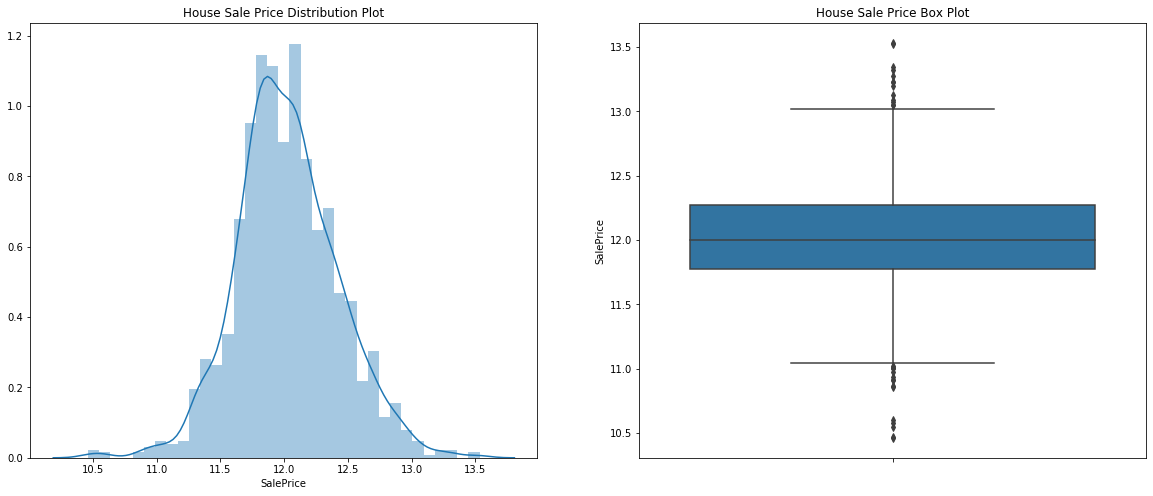

In [25]:
# House sale price data distribution plot and box plot after log transformation
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Sale Price Distribution Plot')
sns.distplot(df_house.SalePrice)

plt.subplot(1,2,2)
plt.title('House Sale Price Box Plot')
sns.boxplot(y=df_house.SalePrice)

plt.show()

### Observation
Now the SalePrice is normally distributed after log transformation.

In [26]:
print(df_house.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.80,0.90,0.99,1]))

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
80%        12.345835
90%        12.535376
99%        13.000323
100%       13.534473
max        13.534473
Name: SalePrice, dtype: float64


### plot method
This is the method which will create plots for each variable against SalePrice. A scatter plot for continuous variable while a boxplot for categorical variable.

In [27]:
#Bivariate Analysis
#Method for creating a boxplot for Categorical variables and a scatter plot for continuous variables against SalePrice
def plot():
    col = df_house.columns
    col = col.drop('Id')
    col = col.drop('SalePrice')
    for i in col:
        plt.figure(figsize=(12, 6))
        if df_house[i].dtypes != 'object':
            sns.scatterplot(x= i,y ='SalePrice',data=df_house)
        else:
            g = sns.boxplot(x=i, y="SalePrice", data=df_house)
            if df_house[i].nunique()>10:
                g.set_xticklabels(g.get_xticklabels(),rotation=90)
        plt.show()
        

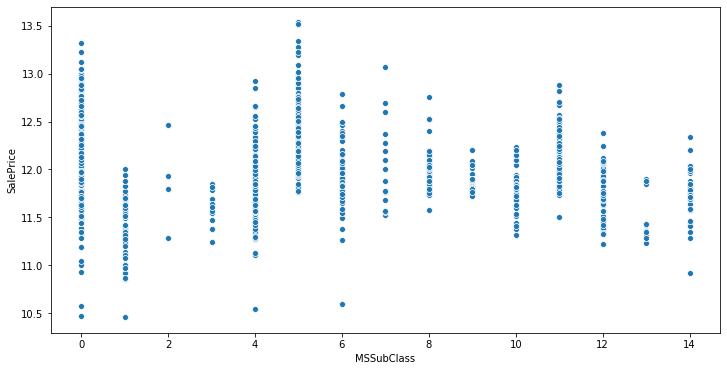

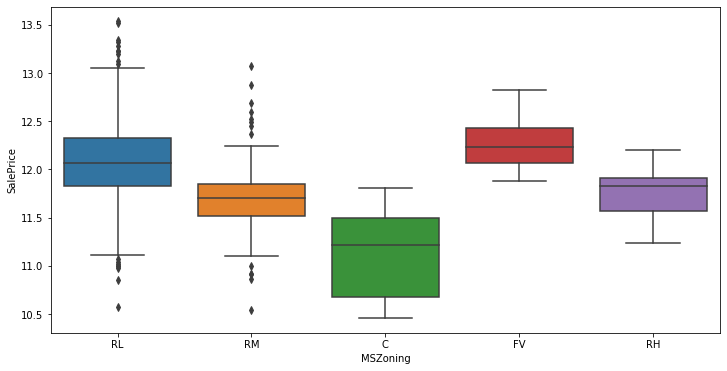

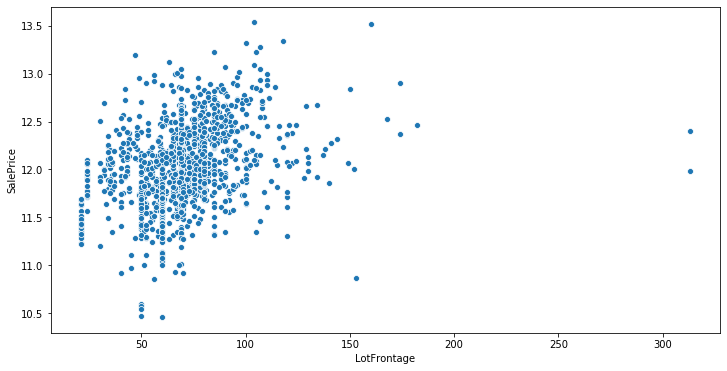

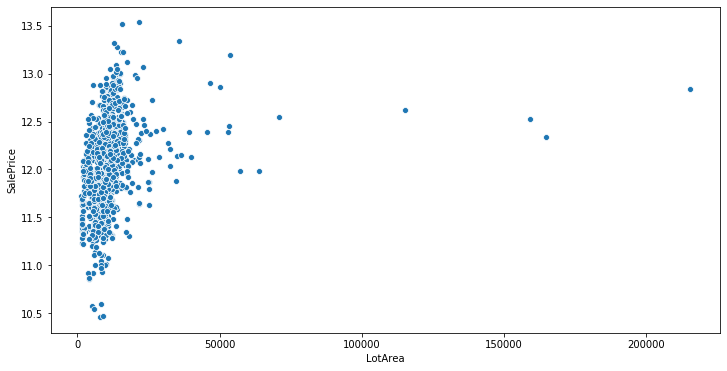

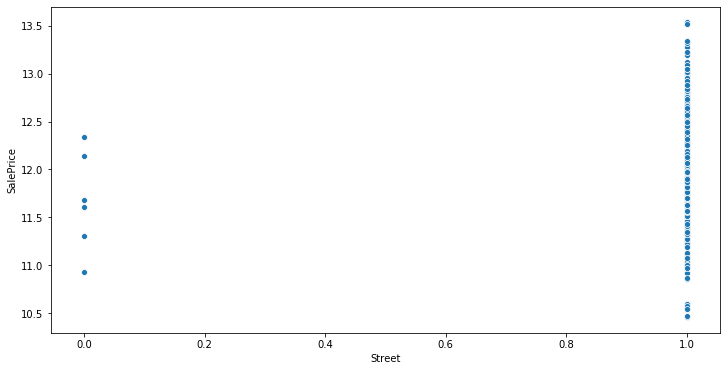

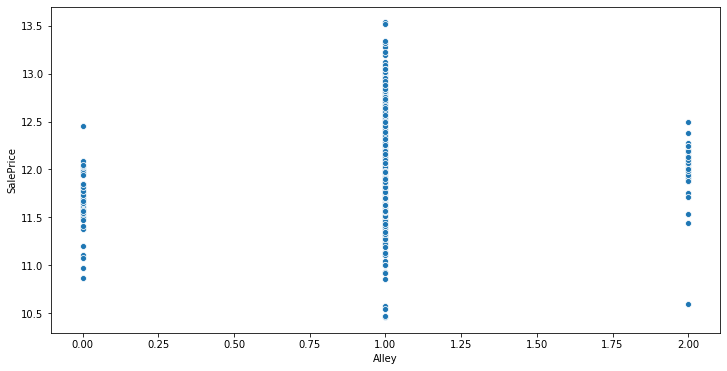

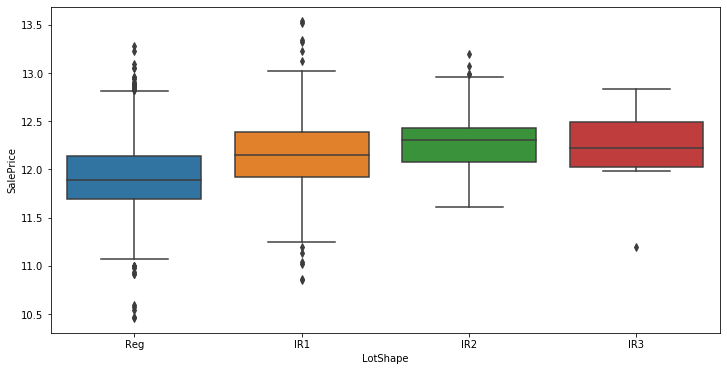

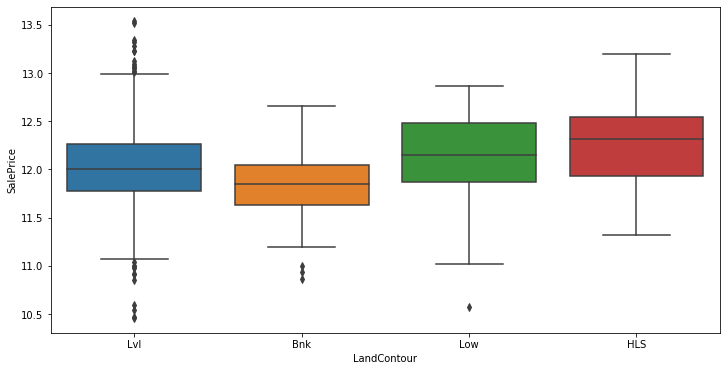

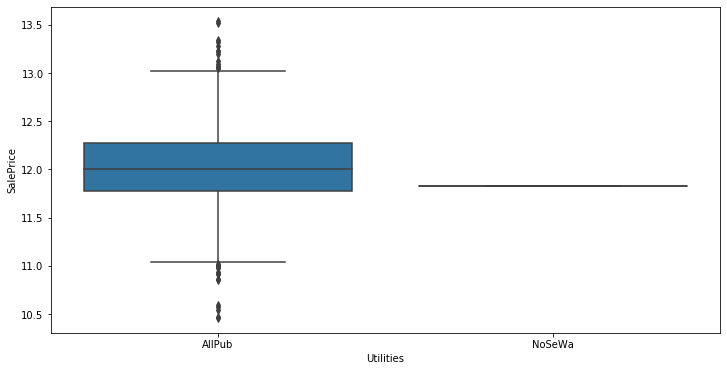

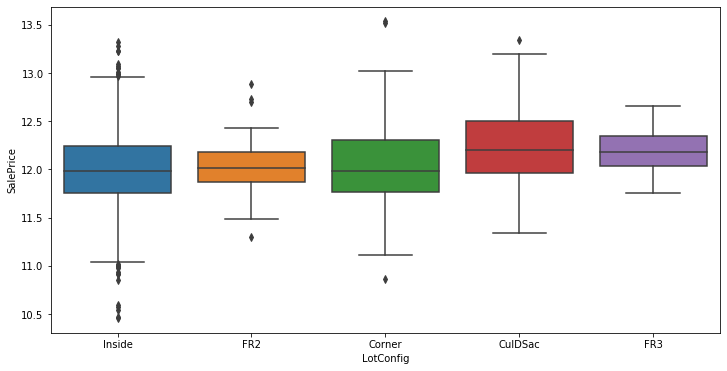

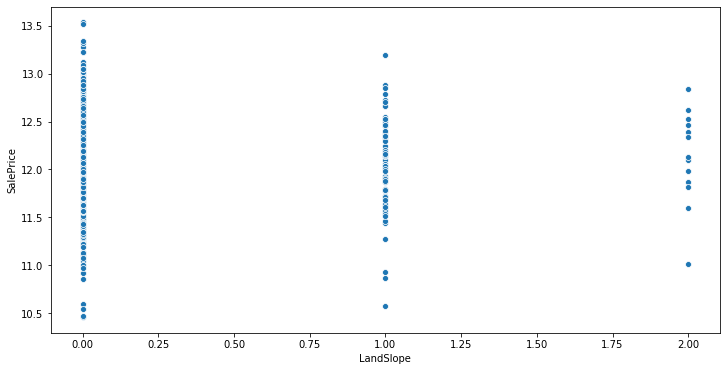

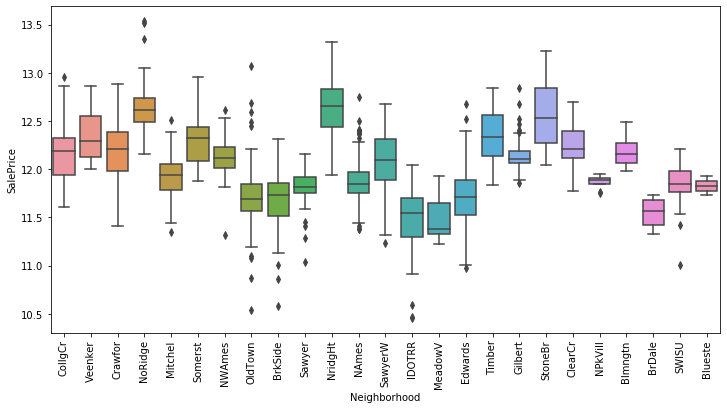

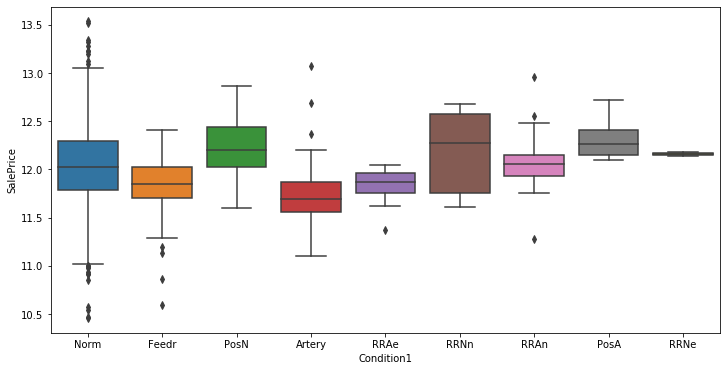

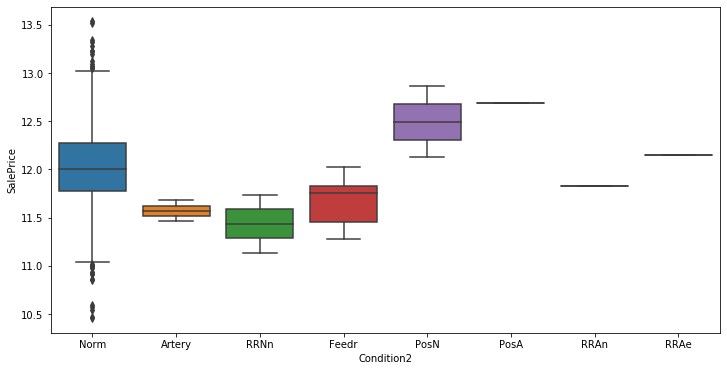

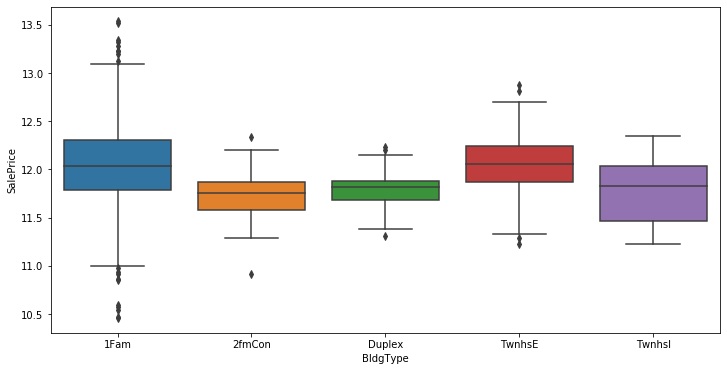

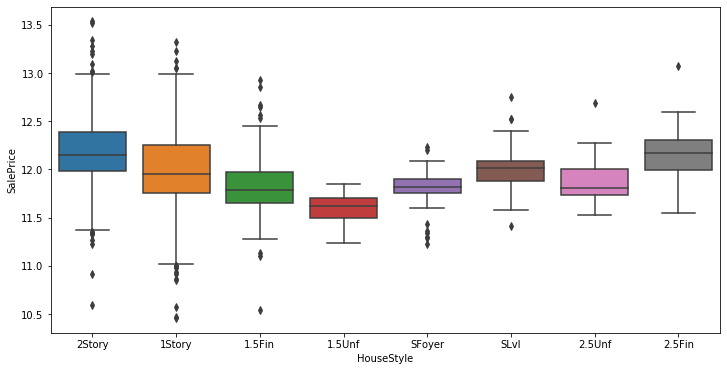

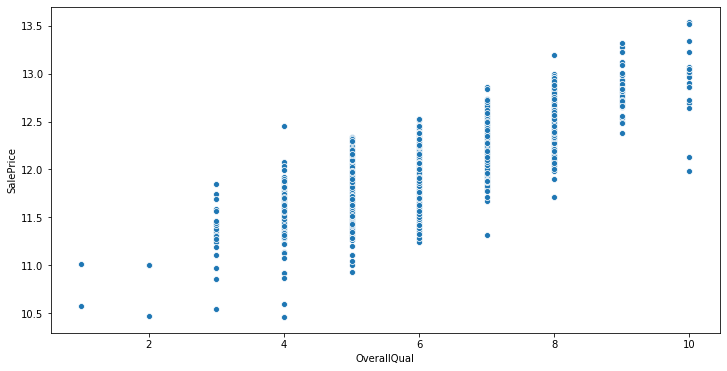

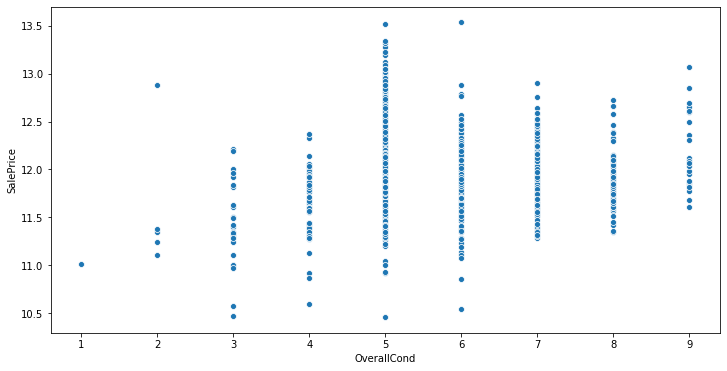

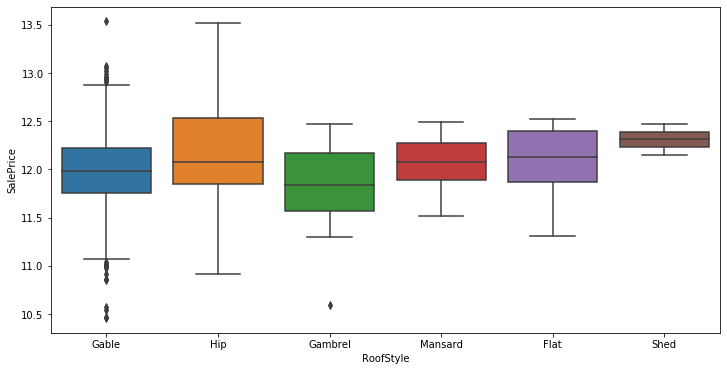

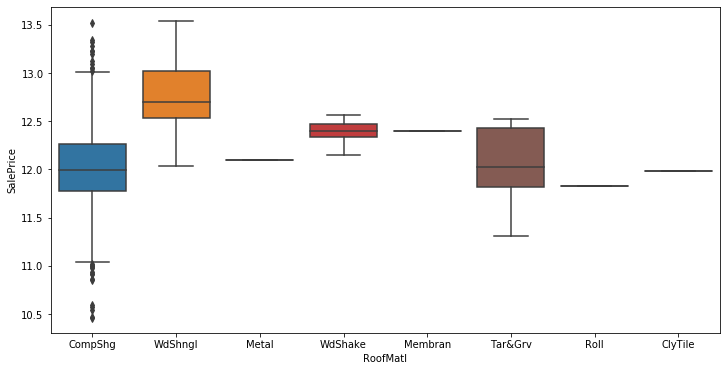

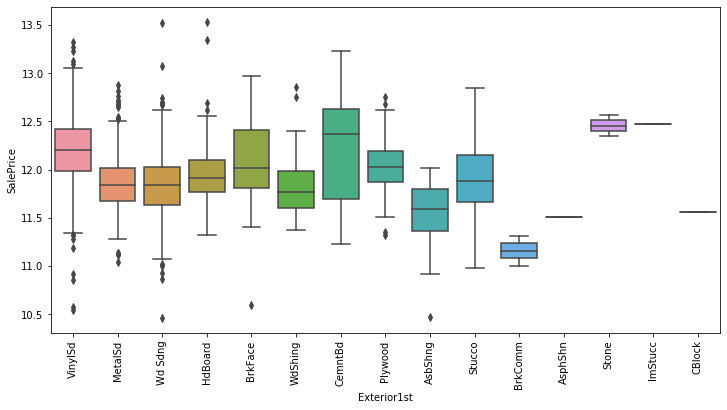

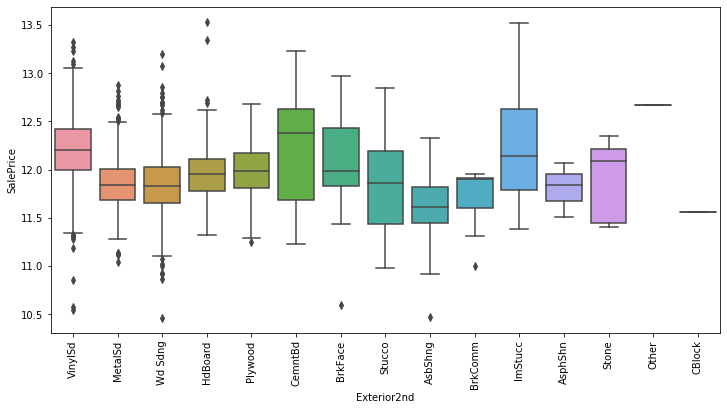

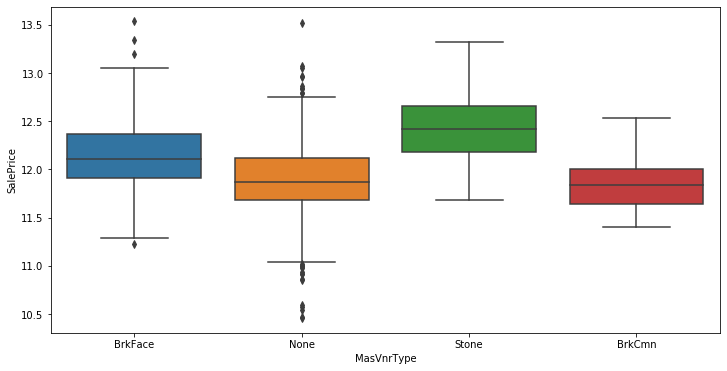

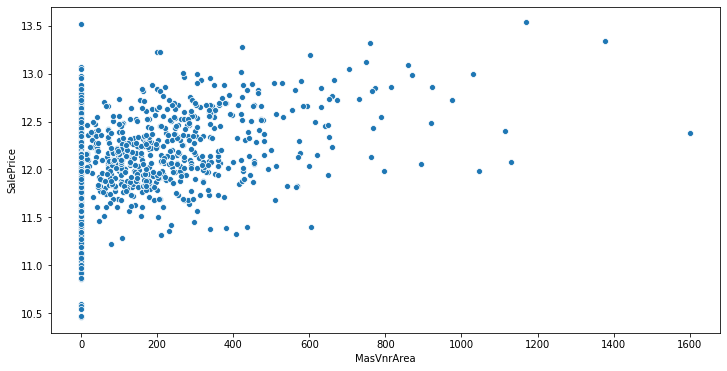

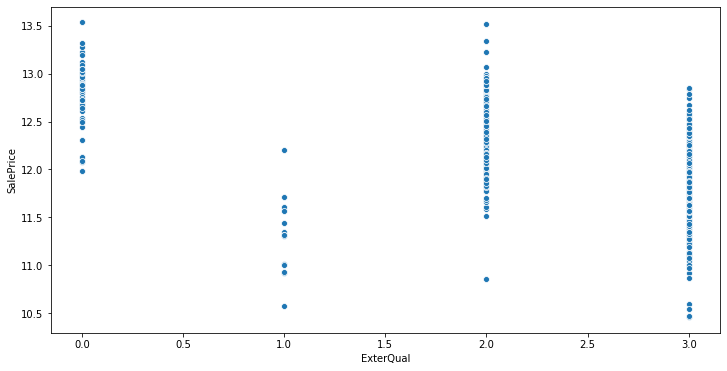

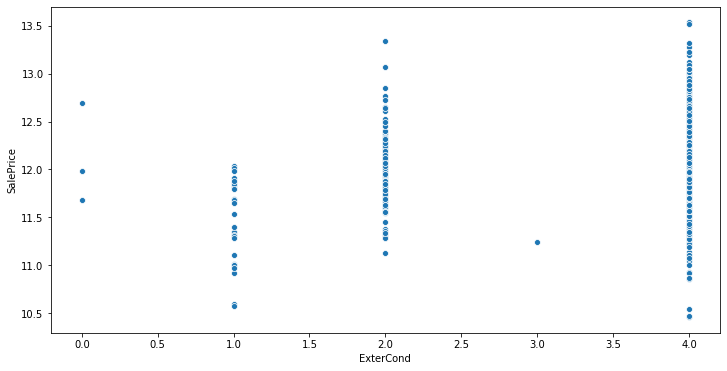

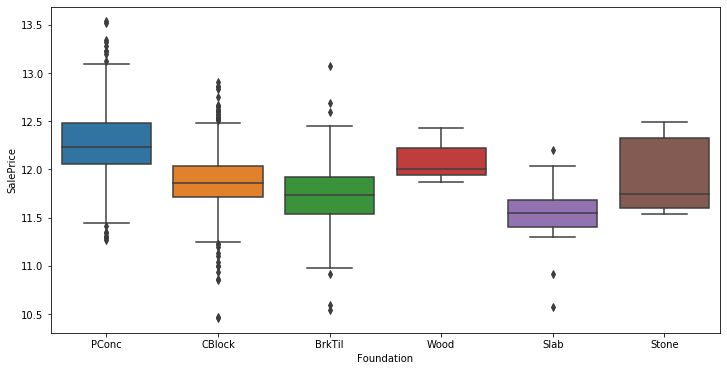

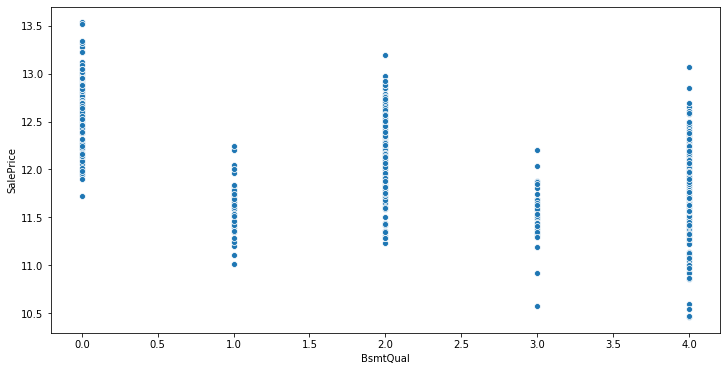

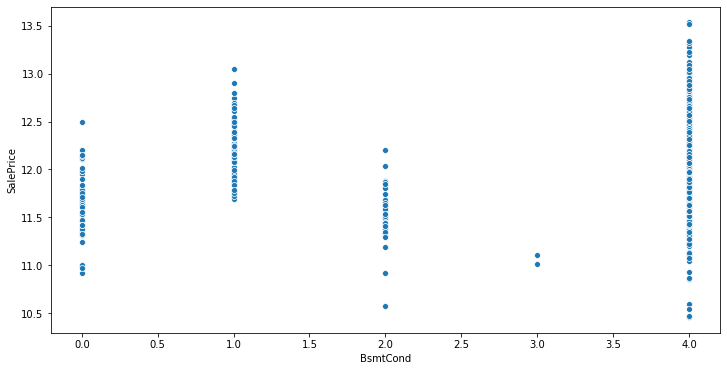

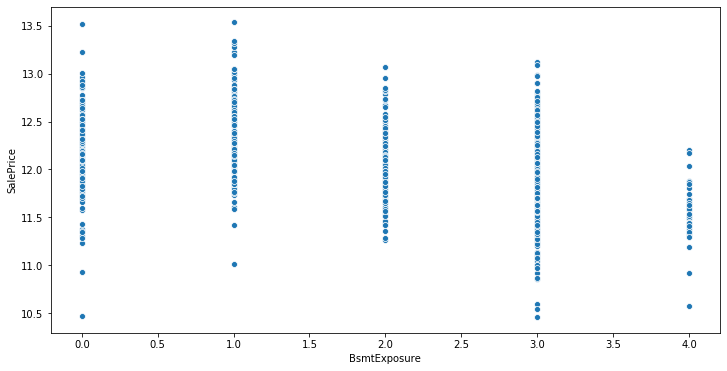

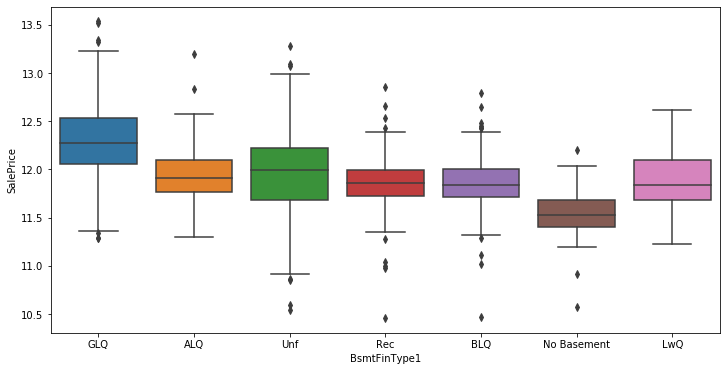

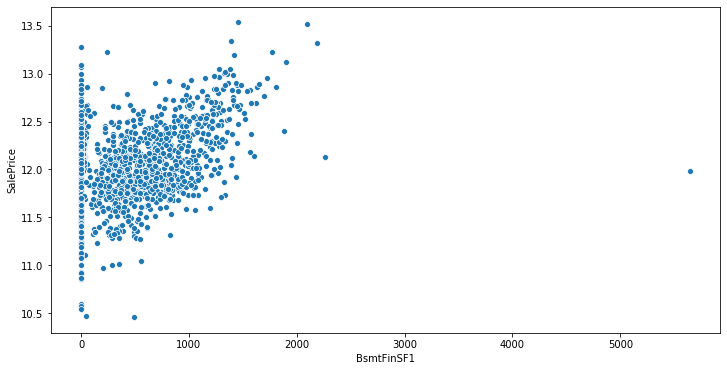

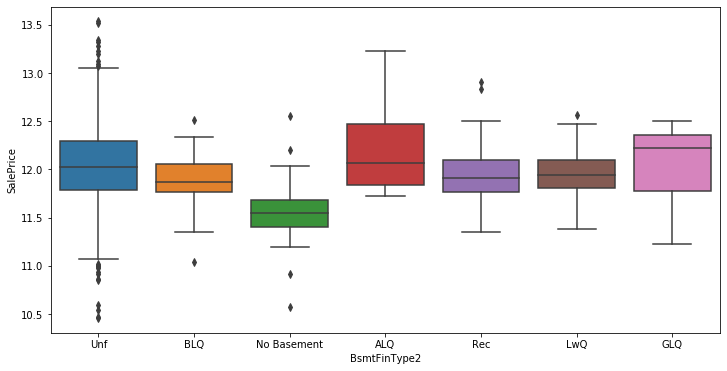

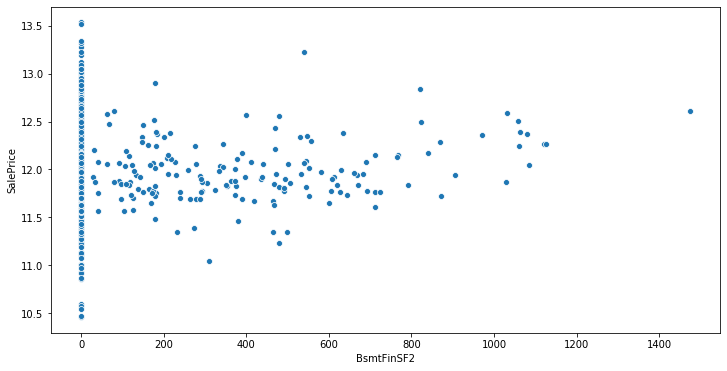

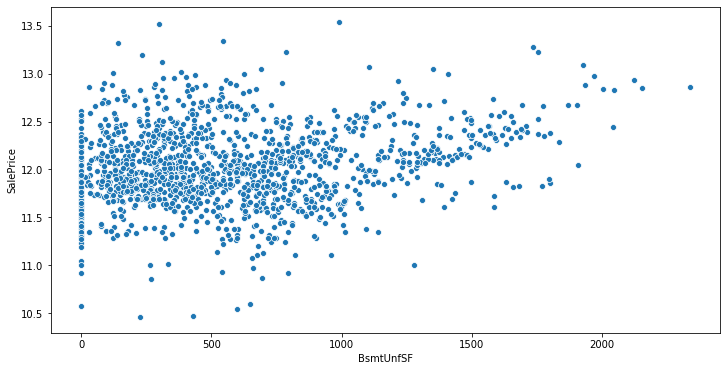

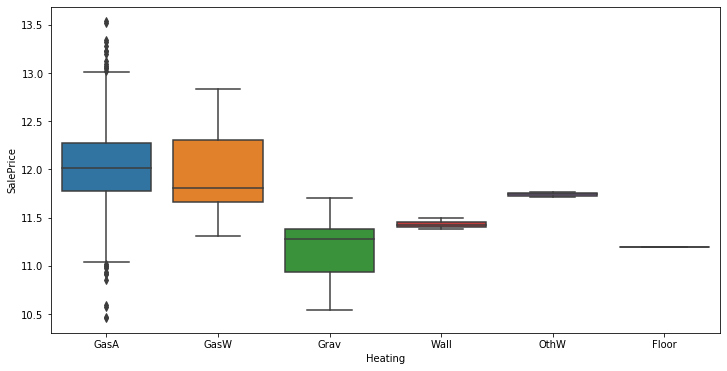

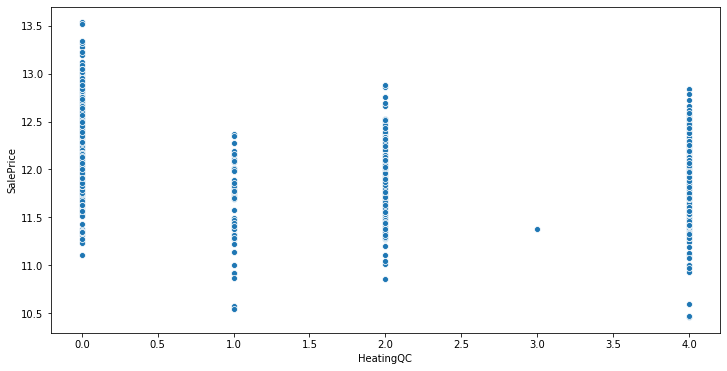

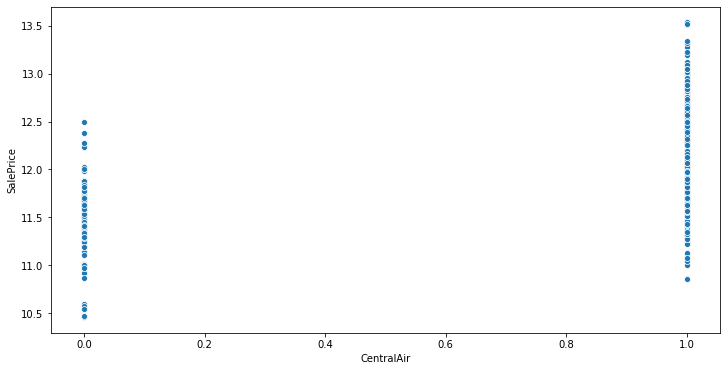

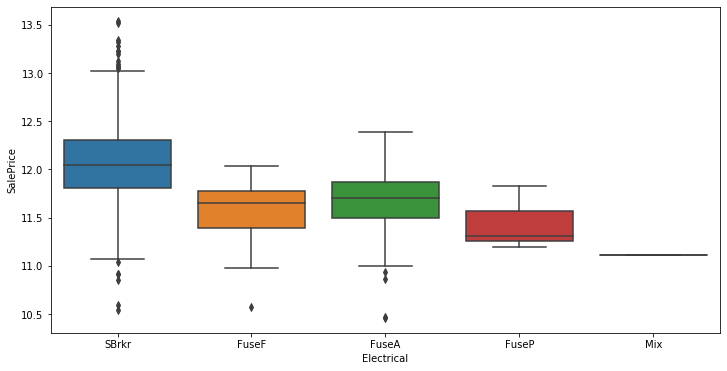

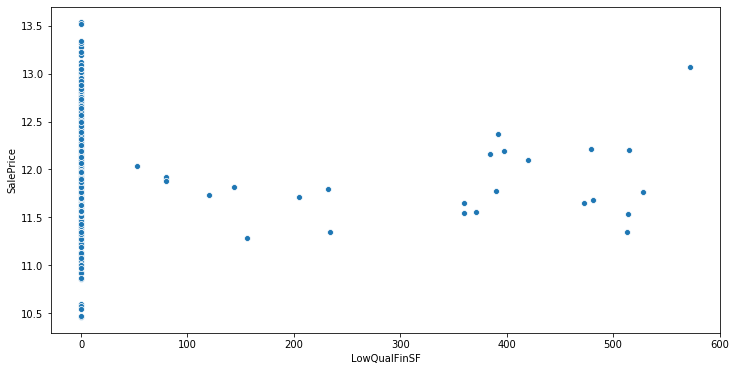

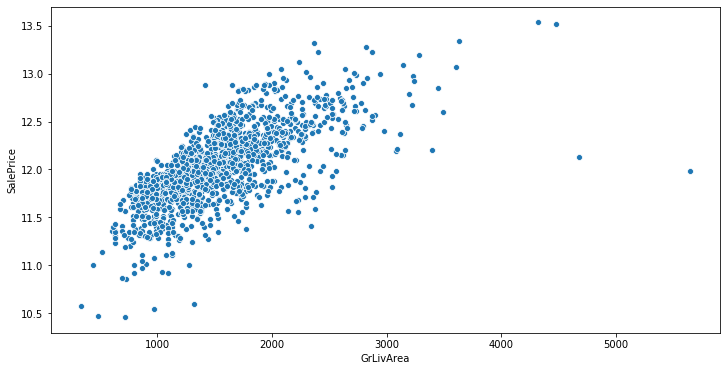

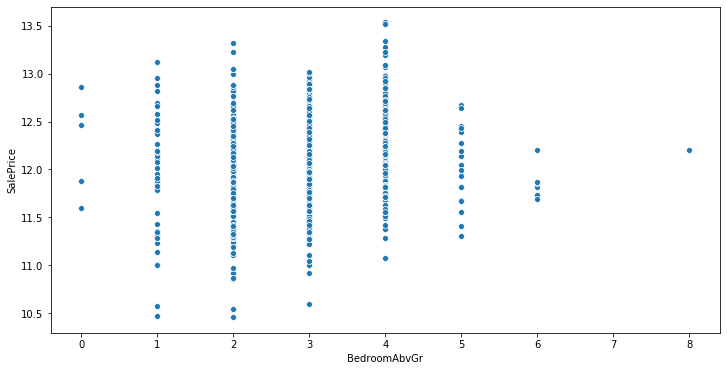

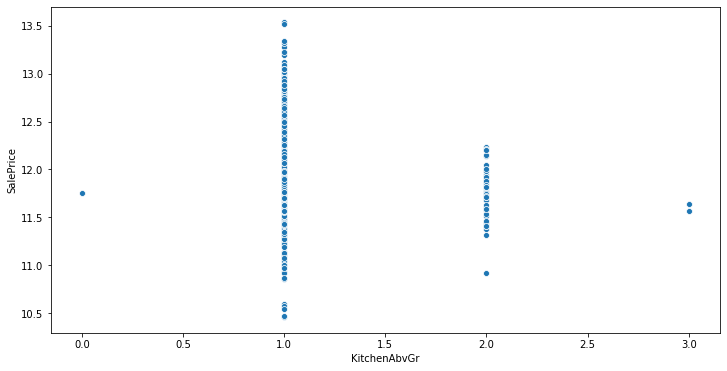

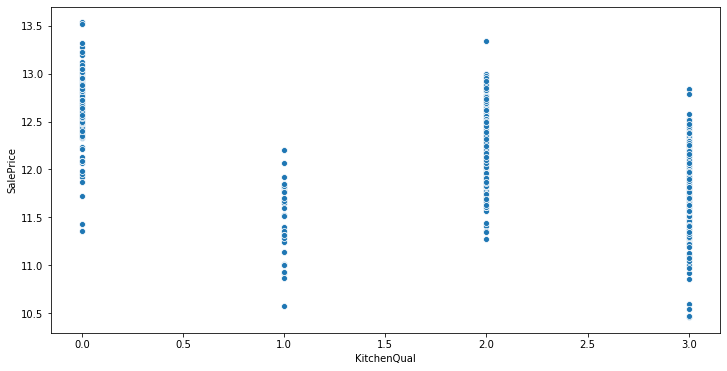

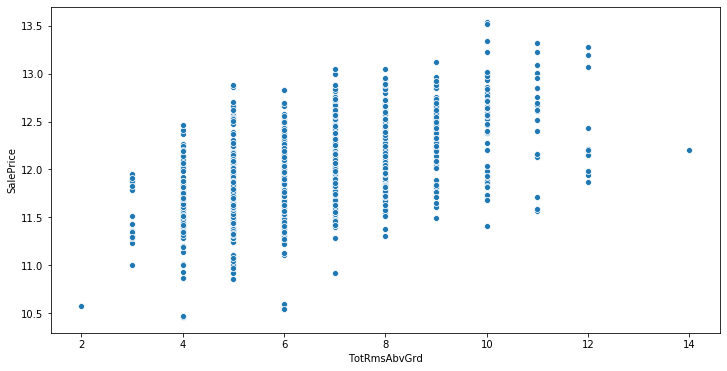

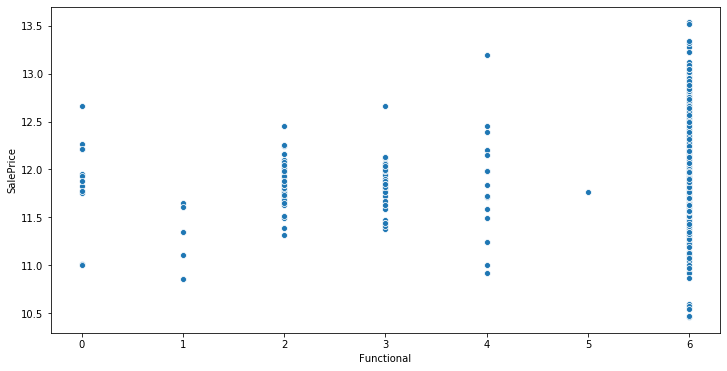

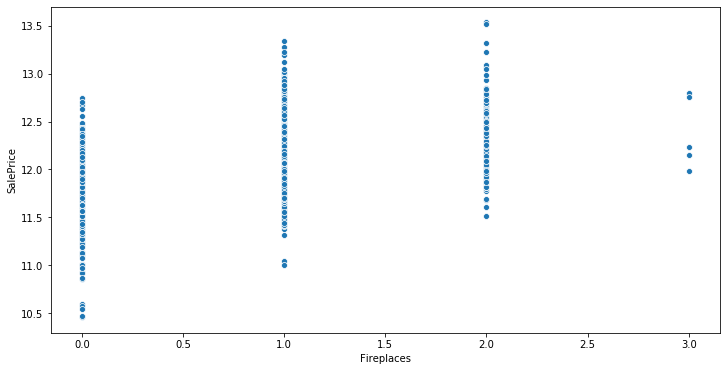

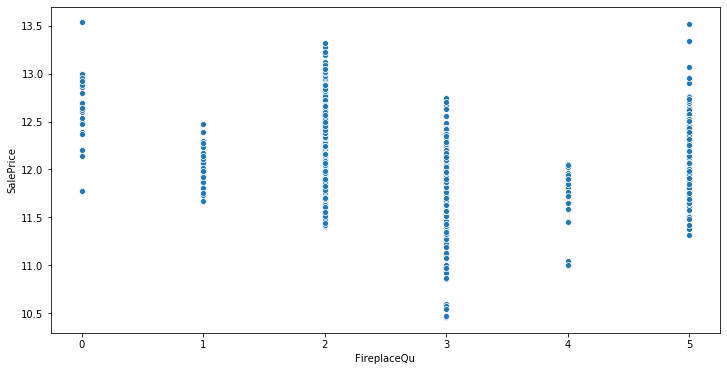

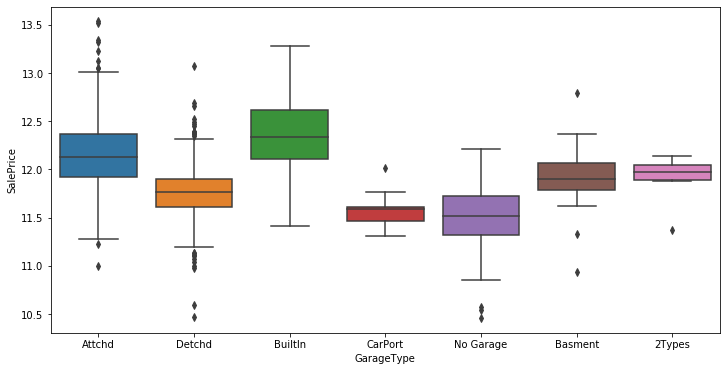

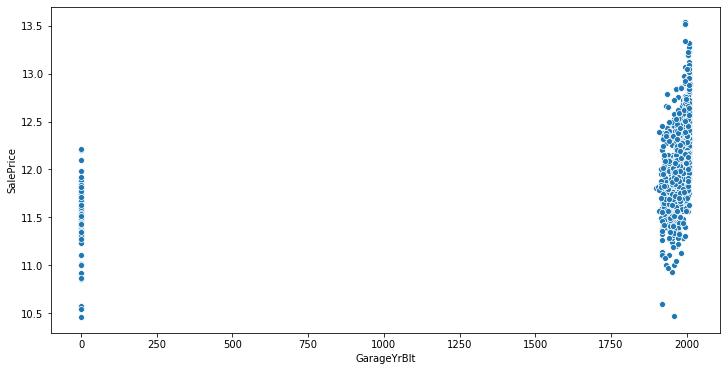

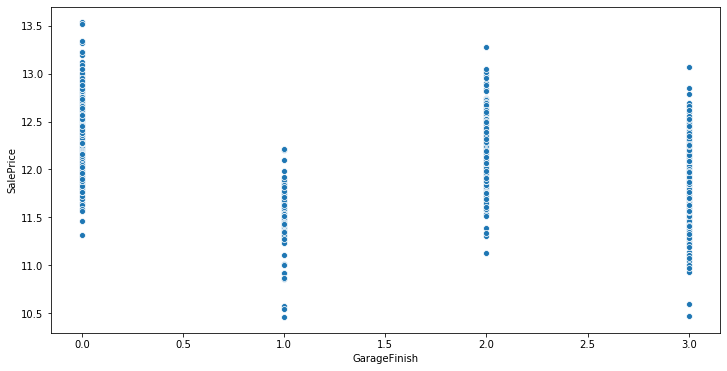

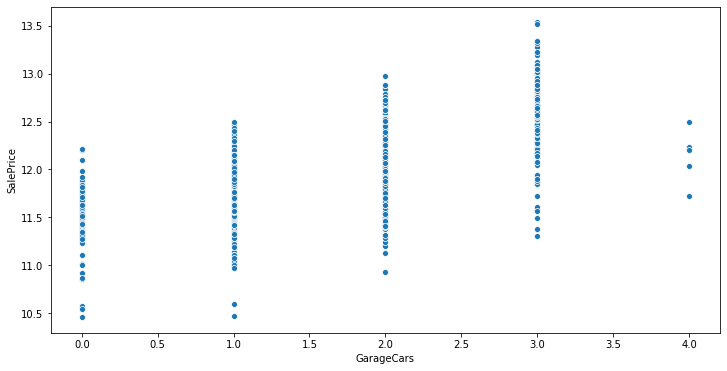

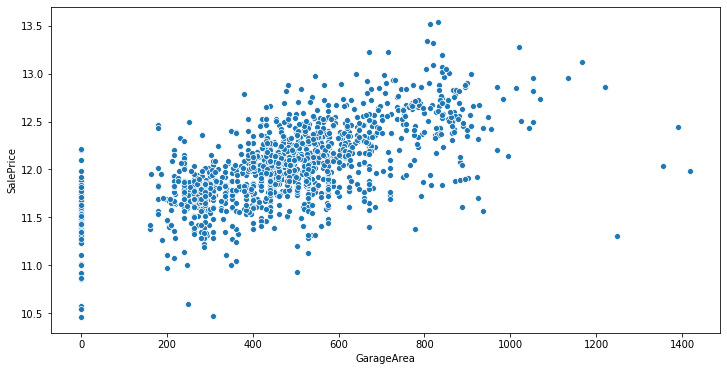

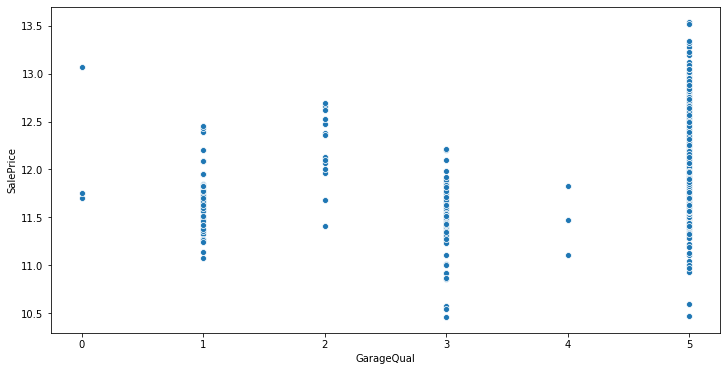

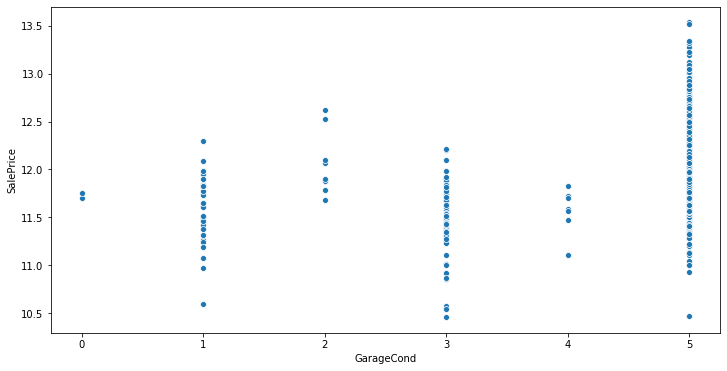

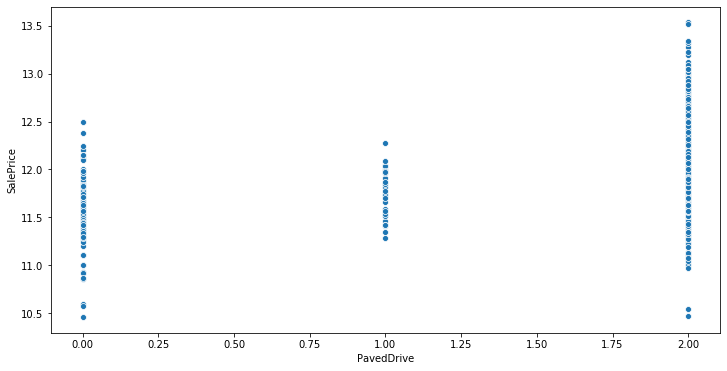

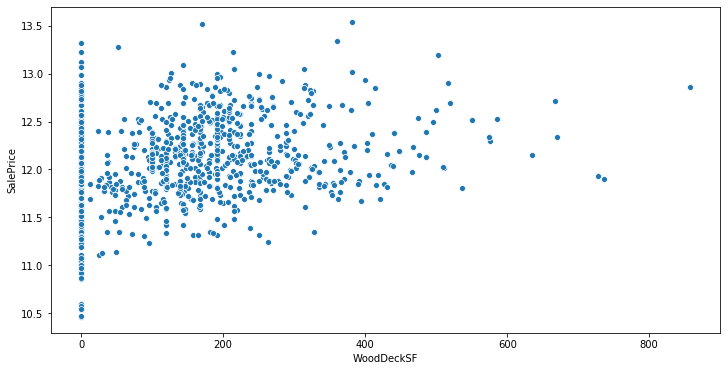

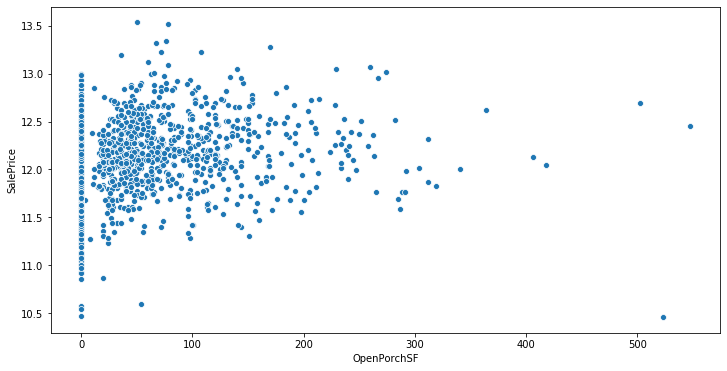

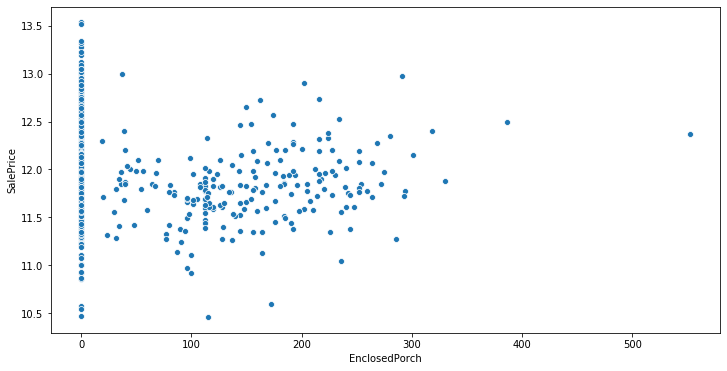

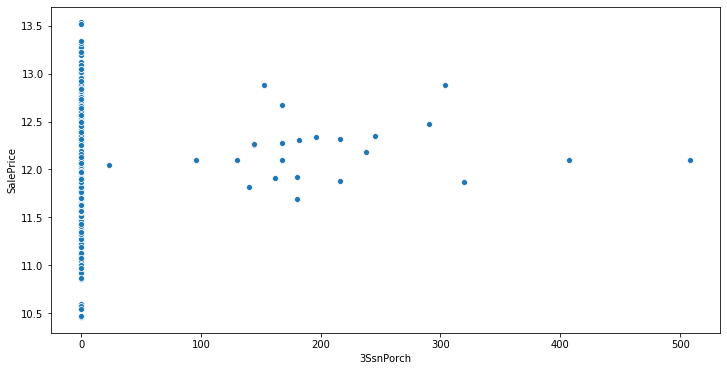

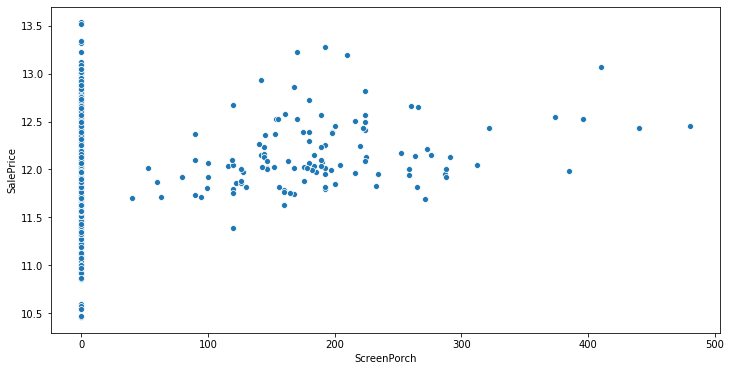

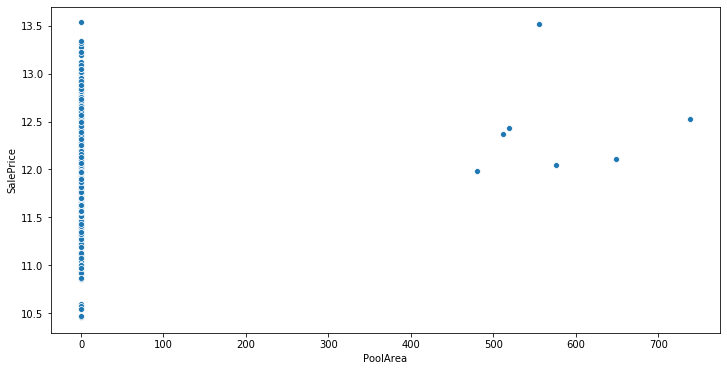

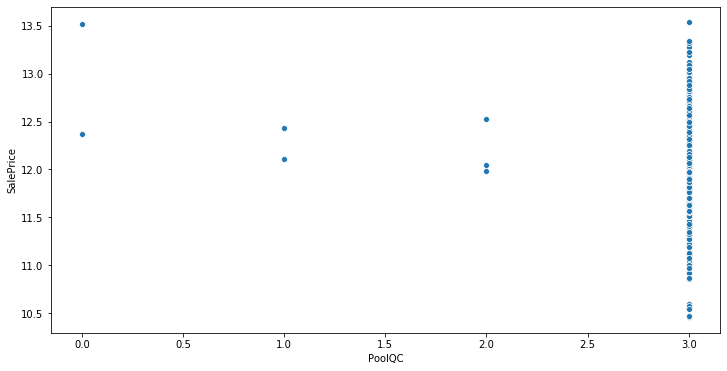

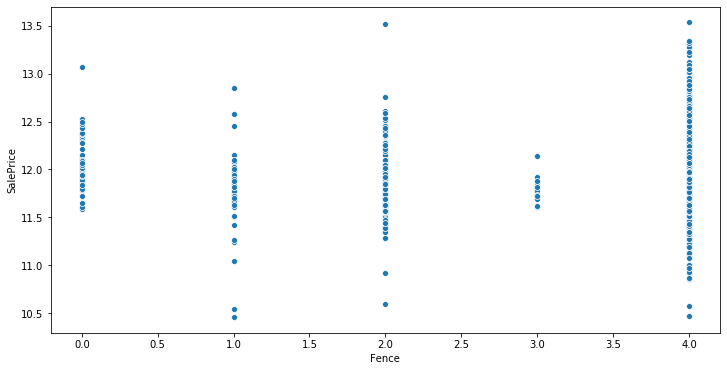

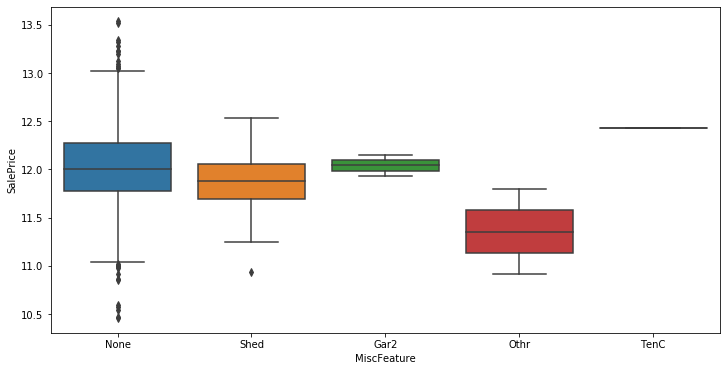

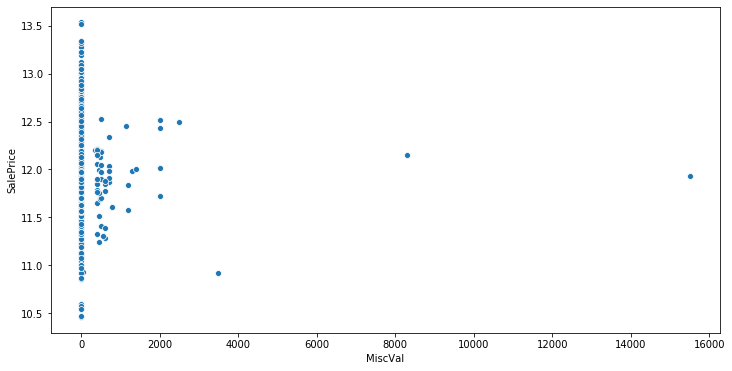

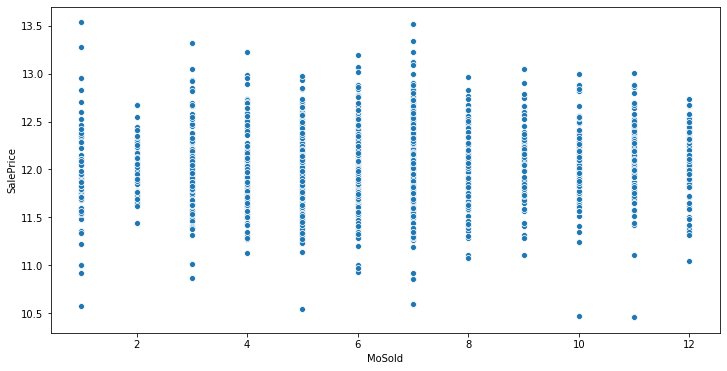

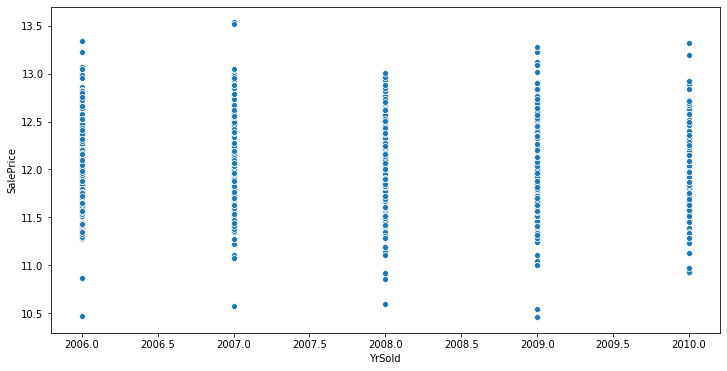

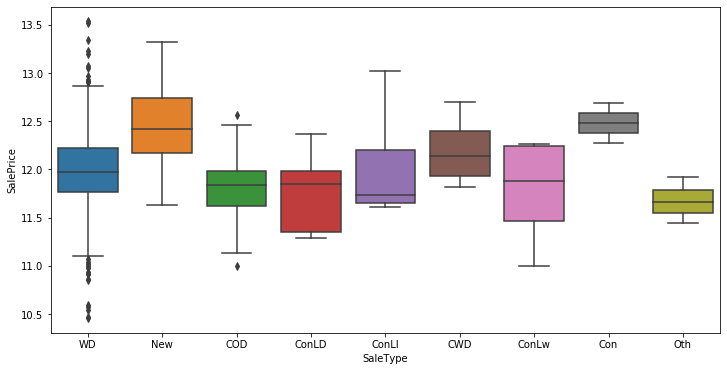

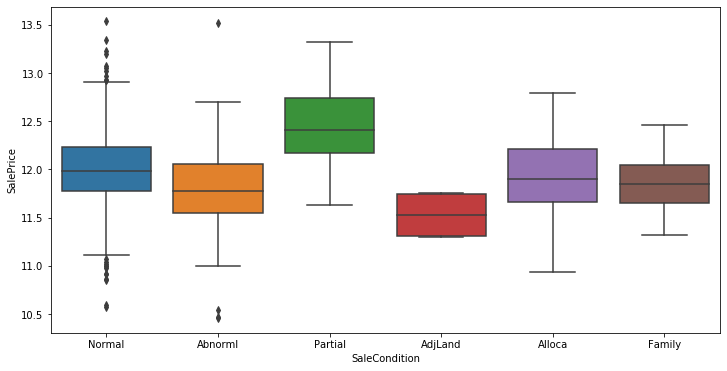

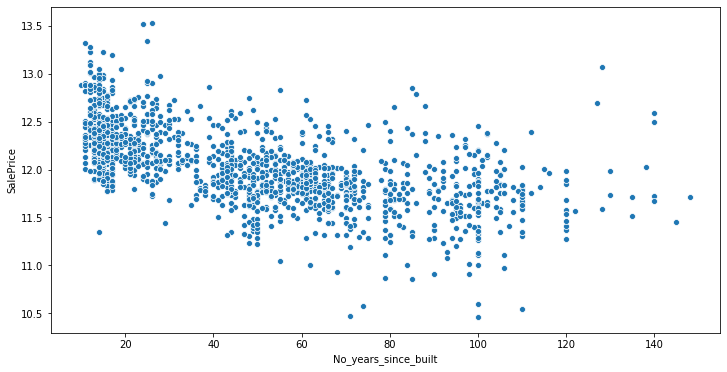

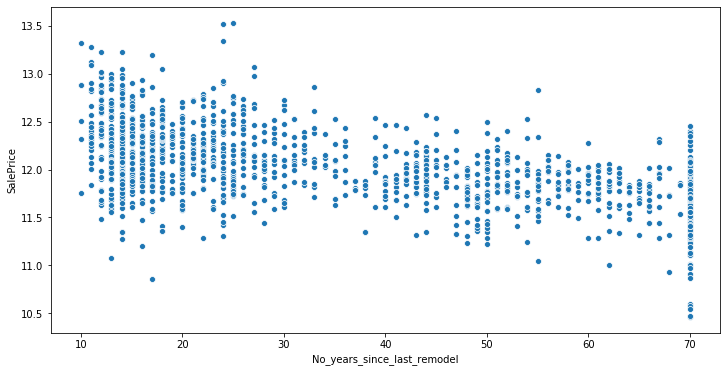

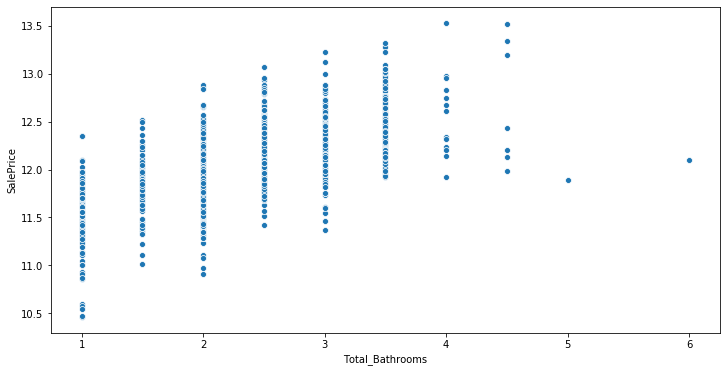

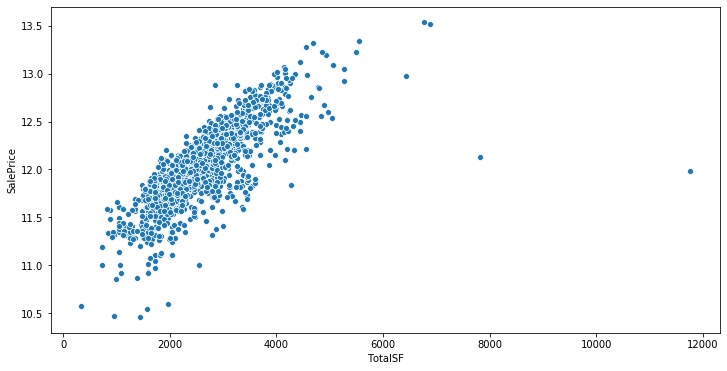

In [28]:
plot()

### Observation
1. In neighborhood graph, Sale Price are highest for No Ridge, StoneBr.
2. As OverallQual increases Sale Price increases.
3. Similarly, as OverallCond increases Sale Price will increase too.
4. RoofMatl WdShngl has highest Sale Price.
5. Stone MasVnrType has highest Sale Price.
6. In Heating variable, GasA and GasW are having highest Sale Price.
7. If a house has Central Air it will have Saling Price more.
8. Electrical SBrkr has highest Sale Price while Mix has lowest.
9. As GrLivArea increases, Sale Price increases.
10. TotRmsAbvGrd increase will increase Sale Price in a similar fashion.
11. The higher the no of fireplaces higher the Sale Price
12. GarageType Builtin has highest Sale Price while No Garage having lowest.
13. Sale Price increases linearly with Garage Area
14. Month of sold july sees higher sale prices while February having lowest.
15. Saletype New has highest sale prices while Other being lowest.
16. Salecondition Partial has highest sale price while Adjland having lowest.
17. Sale Price increases linearly with Total No of Bathrooms.
18. Similarly, as TotalSF increases sale price increases.

In [29]:
#Dropping variable Id which is of no use
df_house.drop(columns='Id', axis = 1, inplace=True)

In [30]:
#Creating a list var for columns having highly skewed data
var=[]
for i in df_house.columns:
    if df_house[i].value_counts().max()> len(df_house[i])*0.85:
        var.append(i)
print(len(var))

29


In [31]:
#Removing above var list variables as it creates a bias
df_house.drop(columns=var, axis = 1, inplace=True)

In [32]:
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,No_years_since_built,No_years_since_last_remodel,Total_Bathrooms,TotalSF
0,5,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,2,PConc,2,3,GLQ,706,150,0,1710,3,2,8,0,3,Attchd,2003.0,2,2,548,0,61,4,2,2008,Normal,12.247694,17,17,3.5,2566
1,0,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,2,1,ALQ,978,284,0,1262,3,3,6,1,5,Attchd,1976.0,2,2,460,298,0,4,5,2007,Normal,12.109011,44,44,2.5,2524
2,5,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,2,PConc,2,2,GLQ,486,434,0,1786,3,2,6,1,5,Attchd,2001.0,2,2,608,0,42,4,9,2008,Normal,12.317167,19,18,3.5,2706
3,6,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Sdng,None,0.0,3,BrkTil,4,3,ALQ,216,540,2,1717,3,2,7,1,2,Detchd,1998.0,3,3,642,0,35,4,2,2006,Abnorml,11.849398,105,50,2.0,2473
4,5,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,2,PConc,2,0,GLQ,655,490,0,2198,4,2,9,1,5,Attchd,2000.0,2,3,836,192,84,4,12,2008,Normal,12.429216,20,20,3.5,3343


### Heat map for correlation

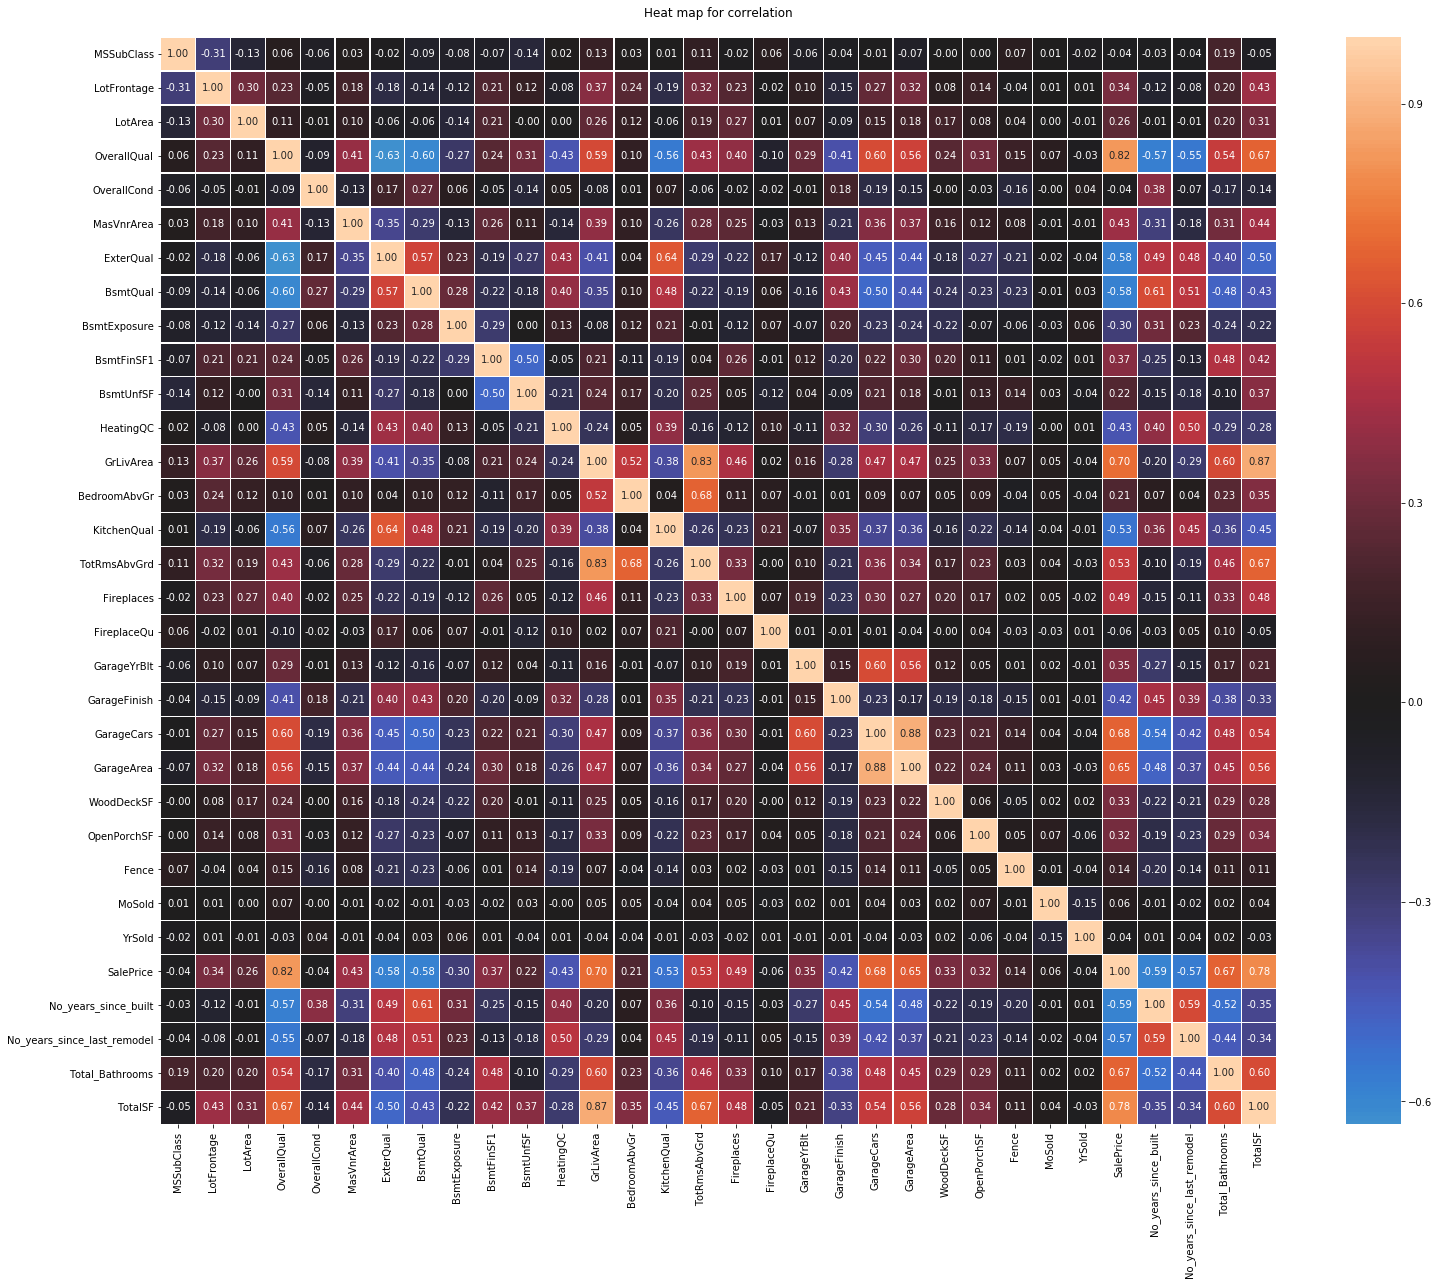

In [33]:
#Heat Map for checking correlation among variables
plt.figure(figsize=(25,20))
plt.title('Heat map for correlation', pad=20)
ax=sns.heatmap(df_house.corr(), linewidth =0.3, center=0, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [34]:
#making a dictionary of variables having greater than 0.5 correlation with SalePrice
di = {}
for i in df_house.select_dtypes(exclude='object').columns:
    if abs(df_house[i].corr(df_house['SalePrice'])) > 0.50:
        di[i]=df_house[i].corr(df_house['SalePrice'])
print(di)

{'OverallQual': 0.8171844179216831, 'ExterQual': -0.5821628006400503, 'BsmtQual': -0.5769681829650545, 'GrLivArea': 0.7009266525441299, 'KitchenQual': -0.5343860233765778, 'TotRmsAbvGrd': 0.5344222037231254, 'GarageCars': 0.680624807436048, 'GarageArea': 0.6508875559020072, 'SalePrice': 1.0, 'No_years_since_built': -0.5865702403842266, 'No_years_since_last_remodel': -0.5656078325911793, 'Total_Bathrooms': 0.6730105940434344, 'TotalSF': 0.7772962148534484}


## Getting Dummies

In [35]:
#List of Categorical Variables
dummy = [i for i in df_house.columns if df_house[i].dtypes=='object']
#print(len(dummy))

#Get dummies
df_dummy = pd.get_dummies(df_house[dummy],drop_first=True)

# Add the results to the original housing dataframe
df_house = pd.concat([df_house, df_dummy], axis = 1)

# Drop variables for which we have created the dummies
df_house.drop(dummy, axis = 1, inplace = True)

## Splitting the dataset into training and test dataset

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_house, train_size = 0.7, test_size = 0.3, random_state = 42)

## Rescaling the features
#### _Standard Scaler Scaling_

In [37]:
from sklearn.preprocessing import StandardScaler
#creating a scaler object one for features and the other for target variable
xscaler = StandardScaler()
# yscaler = StandardScaler()

num_vars = [i for i in df_house.columns if df_house[i].dtypes!='object']

df_train[num_vars] = xscaler.fit_transform(df_train[num_vars])

In [38]:
#dividing into X and y sets for model building
y_train = df_train.pop('SalePrice')
X_train = df_train
X = df_train

In [39]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       ...
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_No Garage', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=135)

In [40]:
#Applying transformation on test data
df_test[num_vars] = xscaler.transform(df_test[num_vars])

In [41]:
#dividing into X and y sets for model building
y_test = df_test.pop('SalePrice')
X_test = df_test

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)
#### RFE: Recursive Feature Elimination

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,35)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 80),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 43),
 ('ExterQual', False, 51),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 9),
 ('BsmtFinSF1', False, 38),
 ('BsmtUnfSF', False, 98),
 ('HeatingQC', False, 19),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 10),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 94),
 ('GarageYrBlt', False, 25),
 ('GarageFinish', False, 90),
 ('GarageCars', True, 1),
 ('GarageArea', False, 32),
 ('WoodDeckSF', False, 26),
 ('OpenPorchSF', False, 86),
 ('Fence', False, 89),
 ('MoSold', False, 62),
 ('YrSold', False, 69),
 ('No_years_since_built', True, 1),
 ('No_years_since_last_remodel', True, 1),
 ('Total_Bathrooms', True, 1),
 ('TotalSF', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 49),
 

In [45]:
#We have our top significant variables in col
col=list(X_train.columns[rfe.support_])
# col

In [46]:
X_train = X_train[col]
X_test = X_test[col]

## Ridge Regressor

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001,0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 15.0, 25.0, 50.0, 100,500,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   12.0, 14.0, 15.0, 25.0, 50.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]

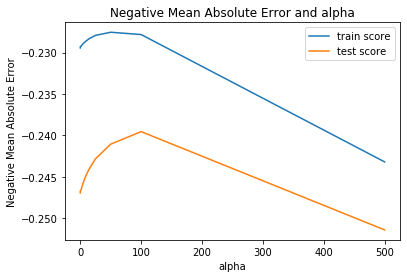

In [49]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
# plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [50]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-0.2395583768594134


In [51]:
alpha = 100
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
y_train_pred = ridge.predict(X_train)
print('Train R2:', r2_score(y_true = y_train, y_pred = y_train_pred))

y_test_pred = ridge.predict(X_test)
print('Test R2:', r2_score(y_true = y_test, y_pred = y_test_pred))

print('RMSE is:', mean_squared_error(y_test, y_test_pred))

Train R2: 0.8823954382276953
Test R2: 0.8874056417630752
RMSE is: 0.12310960766133607


In [53]:
'''Displaying significant variables left after Ridge Regression and the dictionary final_parameters 
contains variable:coefficient as its key:value pair'''

parameters = list(ridge.coef_)
parameters = [np.round(i,3) for i in parameters]

#print(parameters)
colm = X_train.columns
colm = colm.insert(0, "Constant")

final_parameters ={k:v for k,v in zip(colm, parameters) if v!=0}

print(len(final_parameters))
final_parameters

35


{'Constant': -0.035,
 'LotFrontage': 0.055,
 'LotArea': 0.209,
 'OverallQual': 0.113,
 'OverallCond': -0.049,
 'BsmtQual': 0.133,
 'GrLivArea': -0.042,
 'KitchenQual': 0.071,
 'TotRmsAbvGrd': 0.088,
 'Fireplaces': 0.153,
 'GarageCars': -0.122,
 'No_years_since_built': -0.072,
 'No_years_since_last_remodel': 0.087,
 'Total_Bathrooms': 0.061,
 'TotalSF': 0.059,
 'MSZoning_FV': -0.001,
 'MSZoning_RH': 0.043,
 'MSZoning_RL': -0.02,
 'MSZoning_RM': 0.057,
 'Neighborhood_Crawfor': 0.048,
 'Neighborhood_NoRidge': 0.062,
 'Neighborhood_NridgHt': 0.063,
 'Neighborhood_StoneBr': -0.057,
 'BldgType_TwnhsE': -0.062,
 'BldgType_TwnhsI': -0.033,
 'HouseStyle_2Story': -0.041,
 'RoofStyle_Gable': -0.027,
 'RoofStyle_Hip': 0.056,
 'Exterior1st_BrkFace': 0.017,
 'MasVnrType_BrkFace': 0.005,
 'MasVnrType_None': 0.013,
 'MasVnrType_Stone': 0.058,
 'Foundation_PConc': -0.057,
 'BsmtFinType1_No Basement': -0.055,
 'BsmtFinType1_Unf': 0.058}

In [54]:
# Extracting Top 10 predictors from Ridge Regression
ridge_final = pd.DataFrame({'Predictors':list(X_train.columns),'Coefficient':ridge.coef_}).sort_values('Coefficient',ascending=False)
ridge_final.head(10)

,Predictors,Coefficient
2,OverallQual,0.208607
9,GarageCars,0.153212
5,GrLivArea,0.132541
3,OverallCond,0.113073
8,Fireplaces,0.087765
12,Total_Bathrooms,0.086746
7,TotRmsAbvGrd,0.071385
21,Neighborhood_StoneBr,0.063433
20,Neighborhood_NridgHt,0.062348
13,TotalSF,0.060776


## Lasso Regressor

In [55]:
from sklearn.linear_model import Lasso
params = {'alpha': [0.0001, 0.0005, 0.0008, 0.001, 0.002, 0.003, 0.004, 0.005, 0.007, 0.008, 0.009, 0.01]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.0008, 0.001, 0.002, 0.003,
                                   0.004, 0.005, 0.007, 0.008, 0.009, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)

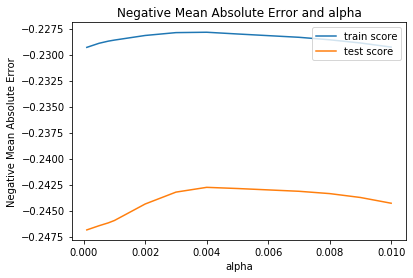

In [57]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
#plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [58]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.004}
-0.24277185057652306


In [59]:
# Taking optimal alpha for test data
lasso = Lasso(alpha=0.004)
lasso.fit(X_train, y_train)

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
# Train, Test accuracy and Mean squared error for Lasso
y_train_pred = lasso.predict(X_train)
print('Train R2:', r2_score(y_true = y_train, y_pred = y_train_pred))

y_test_pred = lasso.predict(X_test)
print('Test R2:', r2_score(y_true = y_test, y_pred = y_test_pred))

from sklearn.metrics import mean_squared_error
print('RMSE is:', mean_squared_error(y_test, y_test_pred))

Train R2: 0.8844467173196384
Test R2: 0.8892252629233568
RMSE is: 0.1211200510739345


In [61]:
'''Displaying significant variables left after Lasso Regression and the dictionary final_parameters 
contains variable:coefficient as its key:value pair'''

parameters = list(lasso.coef_)
parameters = [np.round(i,3) for i in parameters]

colm = X_train.columns
colm = colm.insert(0, "Constant")

final_parameters ={k:v for k,v in zip(colm, parameters) if v!=0}

print(len(final_parameters))
final_parameters

29


{'Constant': -0.039,
 'LotFrontage': 0.056,
 'LotArea': 0.242,
 'OverallQual': 0.121,
 'OverallCond': -0.038,
 'BsmtQual': 0.211,
 'GrLivArea': -0.035,
 'KitchenQual': 0.053,
 'TotRmsAbvGrd': 0.083,
 'Fireplaces': 0.161,
 'GarageCars': -0.158,
 'No_years_since_built': -0.058,
 'No_years_since_last_remodel': 0.083,
 'TotalSF': 0.064,
 'MSZoning_RH': 0.056,
 'MSZoning_RM': 0.059,
 'Neighborhood_Crawfor': 0.044,
 'Neighborhood_NoRidge': 0.067,
 'Neighborhood_NridgHt': 0.064,
 'Neighborhood_StoneBr': -0.066,
 'BldgType_TwnhsE': -0.069,
 'BldgType_TwnhsI': -0.053,
 'HouseStyle_2Story': -0.033,
 'RoofStyle_Gable': -0.017,
 'RoofStyle_Hip': 0.053,
 'MasVnrType_Stone': 0.051,
 'Foundation_PConc': -0.064,
 'BsmtFinType1_No Basement': -0.059,
 'BsmtFinType1_Unf': 0.055}

In [62]:
# Extracting Top 10 predictors from Lasso Regression
lasso_final = pd.DataFrame({'Predictors':list(X_train.columns),'Coefficient':lasso.coef_}).sort_values('Coefficient',ascending=False)
lasso_final.head(10)

,Predictors,Coefficient
2,OverallQual,0.241671
5,GrLivArea,0.211301
9,GarageCars,0.160707
3,OverallCond,0.120560
8,Fireplaces,0.083376
12,Total_Bathrooms,0.082584
20,Neighborhood_NridgHt,0.066767
14,MSZoning_FV,0.064262
21,Neighborhood_StoneBr,0.063608
18,Neighborhood_Crawfor,0.058927


## Conclusion
1. I have performed both Ridge and Lasso Regression on the given House Sale Price dataset.
2. At the RFE step I am taking 35 most significant variables.
3. After performing Ridge Regression, the __train accuracy__ comes out to be __0.8824__ while its __test accuracy__ is __0.8874__ with __mean squared value of 0.1231.__
4. Lasso Regression results are :- __train accuracy = 0.8844__, __test accuracy = 0.8892__, and __mean squared value = 0.1211__.
5. Ridge Regression results are coming from 35 significant variables while Lasso giving slightly better test results from 29  variables.So, I would go with Lasso Regression for model building.
6. Top 10 predictors from Lasso Regression model are:OverallQual, GrLivArea, GarageCars, OverallCond, Fireplaces, Total_Bathrooms, Neighborhood_NridgHt, MSZoning_FV, Neighborhood_StoneBr, Neighborhood_Crawfor.
